### Market Equilibrium Without FOCs

**Core Problem:** Perfectly Competitive Exchange Economy
* Two consumers: A, B
* Two goods: $x_1, x_2$
* Utility: $(x_1^r + x_2^r)^{\frac{1}{r}}$
* Endowments: $\{(y_1^A, y_2^A), (y_1^B, y2_B)\} = \{(10, 5), (5, 40)\}$ 

**GOAL** Find equilibrium prices and allocation

In [1]:
import numpy as np
import pandas as pd
#import plotly.express as px
#import plotly.graph_objects as go
import scipy.optimize as opt
import math
import matplotlib.pyplot as plt

In [2]:
# Primitives
# CES Parameter Values
r = .6
# Individual Endowments
y = np.array([[10, 5], [5, 40]])
# Total endowments (sums individual endowments by column)
totals = np.sum(y, axis = 1)

In [3]:
# Fxn: cesutility
# Desc: Calculates the CES utility of a consumption bundle
# Args:
#   x: 2 element array of x1 and x2
#   r: CES parameter
# Return:
#   util: Utility value
def cesutility(x, r = r):
    util = (x[0] ** r + x[1] ** r) ** (1/r)
    return util

# Same as above but returns the negative (for minimization)
def minutil(x, r = r):
     util = (x[0]**r + x[1]**r)**(1/r)
     return -util

In [4]:
# Fxn: cesindif
# Desc: Calculates the amount of x1 needed to maintain a given amount of
#       utility given an amount of x0
# Args:
#   U: scalar, level of utility
#   x0: scalar, level of x0
#   r: scalar, CES utility parameter
# Return:
#   x1: level of x1
def cesindif(U, x0, r = r):
    x1 = (U**r - x0**r)**(1/r)
    return(x1)

### Indiference Curves

In [5]:
# Calculate utility at endowments
UA = cesutility(y[0, :])
UB = cesutility(y[1, :])

# Grid of all possible x1 for person a (and person b for that matter)
x1a = np.linspace(0, totals[0], 100)

# Calculate Indiference Curves
x2a = cesindif(UA, x1a)
x2b = cesindif(UB, x1a)

# Scale Y axis for person B
x1b = totals[0] - x1a
x2b = totals[1] - x2b

(0.0, 45.0)

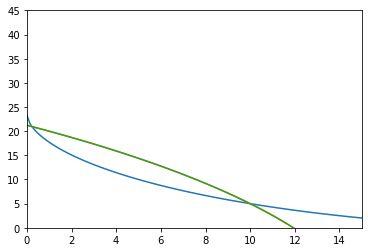

In [6]:
plt.plot(x1a,x2a)
plt.plot(x1b,x2b)
plt.plot(x1b,x2b)
plt.xlim(0,totals[0])
plt.ylim(0,totals[1])

# Budget constraint

(0.0, 45.0)

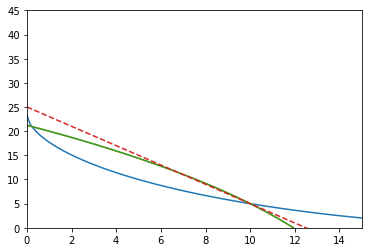

In [7]:
# Vector of prices
p = np.array([1, .5])

# Person A wealth at endowent
wA = np.dot(p,y[0, :])

# Amount of x2 person A can buy given an amount of x1
c2a = (wA - x1a*p[0])/p[1]

plt.plot(x1a,x2a)
plt.plot(x1b,x2b)
plt.plot(x1b,x2b)
plt.plot(x1a,c2a, '--')
plt.xlim(0,totals[0])
plt.ylim(0,totals[1])

### Individual Demand

In [8]:
# Defines a LinearConstraint object given an endowment and vector of prices

# Fxn: make_contraint
# Desc: Defines a scipy.optimize LinearConstraint given endowment/price vectors
# Args: 
#   endow: array, endowment of x1, x2
#   p: array: prices of x1, x2
# Return: 
#   const: linear constraint
def make_constraint(endow, p):
    I = np.dot(p,endow)
    const = opt.LinearConstraint(p, I, I)
    return const

In [9]:
# Make constrain for person A, calculate their utility maximimzing bundle and indiference curve
constA = make_constraint(y[0, :], p)

# Minimize the negative utility function given the linear constraint
retA = opt.minimize(minutil,
               x0 = 10 * np.random.random(2),
               constraints = constA)
# Optimal consumption/maximum utility
xA = retA.x
max_utilA = -retA.fun
# Indiference curve at optimal consumption point
max_indifA = np.array([cesindif(max_utilA, x1) for x1 in x1a])

In [10]:
# Same as above but for person B
constB = make_constraint(y[1, :], p)

retB = opt.minimize(minutil,
               x0 = 10 * np.random.random(2),
               constraints = constB)

xB = retB.x
max_utilB = -retB.fun
max_utilA = -retA.fun
max_indifB =cesindif(max_utilB, x1a)
max_indifB = 45 - max_indifB

### Agegate Demand

In [11]:
# Fxn: agg_demand
# Desc: Calculates the total demand given a set of prices and endowments
# Args: 
#   p2: scalar, price of x2 (price of x1 is set to 1)
#   y: 2x2 array, endowments
# Return: 
#   agg_dem2: the total demand for x2
def agg_demand(p2, y):
    
    # Array of prices, set the price of x1 to 1
    p = np.array([1, p2])
    
    # Find individual demands
    constA = make_constraint(y[0, :], p)
    constB = make_constraint(y[1, :], p)

    xA = opt.minimize(minutil,
                  x0 = 10 * np.random.random(2),
                  constraints = constA).x
    
    xB = opt.minimize(minutil,
                  x0 = 10 * np.random.random(2),
                  constraints = constB).x
    
    # Sum total demands for x2
    agg_dem2 = xA[1] + xB[1]

    return agg_dem2

In [12]:
# Array of different possible prices for x2
p2_grid = np.linspace(.1, 2, 100)

# Calculate total demand at each price

agg_dem2 = np.zeros_like(p2_grid)
for i in range(np.shape(p2_grid)[0]):
    agg_dem2[i] = agg_demand(p2_grid[i], y)

# Total supply of 2 is just the endowment (repeat it 100 times for plotting)
agg_sup2 = np.repeat([totals[1]], 100)


C:\Users\email\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


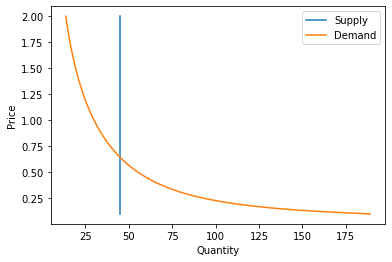

In [13]:
plt.plot(agg_sup2, p2_grid, label='Supply')
plt.plot(agg_dem2, p2_grid, label='Demand')
plt.ylabel('Price')
plt.xlabel('Quantity')
plt.legend()